### Introduction:


This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.
    
   

 Kaggle Dataset : https://www.kaggle.com/farhanmd29/50-startups

Observation: The dataset predicts accurately (94% accuracy) as per the dataset with the parameters given. However for future considerations a dataset with more features like industry, company size et al can be done.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# importing the dataset
dataset = pd.read_csv('data/50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [5]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
dataset.iloc[:,3].describe()

count             50
unique             3
top       California
freq              17
Name: State, dtype: object

 State is a categorical variable with 3 different values possible.
California is with top frequenecy of 17

In [9]:
dataset["State"] = dataset["State"].replace("New York", 2)

In [11]:
dataset["State"] = dataset["State"].replace("Florida", 1)

In [13]:
dataset["State"]= dataset["State"].replace("California", 0)

In [14]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### Visualization

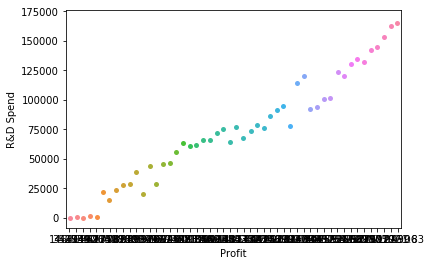

In [54]:
# R&D Spend vs Profit
from matplotlib import pyplot
import seaborn as sns

sns.stripplot(x='Profit', y = 'R&D Spend', data = dataset)
## The plot between Profit and R&d spend clearly shows the plot depends mainly upon R&D

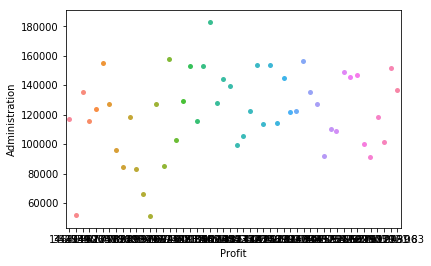

In [55]:
# Administration vs Profit
from matplotlib import pyplot
sns.stripplot(x = 'Profit', y = 'Administration', data = dataset)

Text(0.5, 1.0, 'Marketing spend vs Profit')

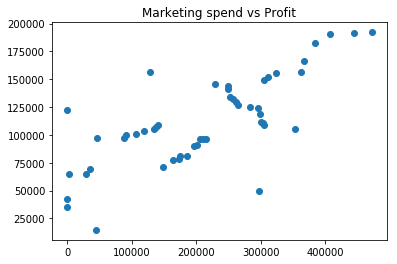

In [56]:
# Marketing spend vs Profit
from matplotlib import pyplot
pyplot.scatter(dataset.iloc[:,2:3].values,dataset.iloc[:,4:5])
pyplot.title('Marketing spend vs Profit')

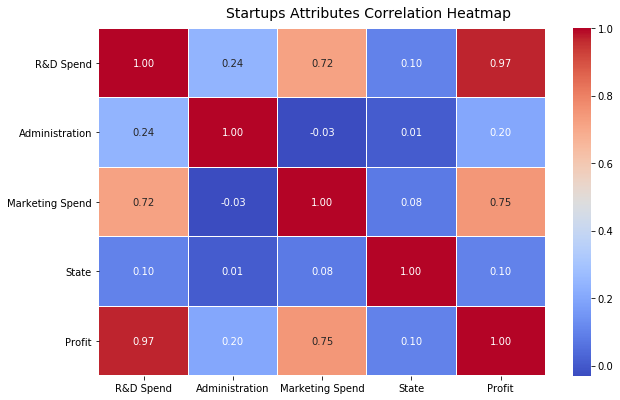

In [45]:
import seaborn as sns 
#SNS heatmap to correlerate
# Correlation Matrix Heatmap
# The heatmap shows how each variable are correlated to another variable
sub_plot, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
sub_plot.subplots_adjust(top=0.93)
t= sub_plot.suptitle('Startups Attributes Correlation Heatmap', fontsize=14)

### Preprocessing

In [21]:
dataset.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [28]:
# matrix of features as X and dep variable as Y (convert dataframe to numpy array)
Y = dataset["Profit"]           #Profit
X = dataset[["R&D Spend","Administration","Marketing Spend", "State"]]          #R&D spend, Administration, Marketing Spend, State


In [31]:
X.head()
#Y
#dataset["State"].value_counts()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [32]:
#X1 = dataset.iloc[:,:-1].values
#X1
# X[:,3]

In [ ]:
# Encoding Categorical variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#en = LabelEncoder()
#X1 = X
#X1[:,3] = en.fit_transform(X[:,3])
#oh = OneHotEncoder(categorical_features=[3])
#X1 = oh.fit_transform(X1)    

In [34]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
# converting from matrix to array
#X1 = X1.toarray()
#X1

In [ ]:
# Dummy variable trap ---- Removing one dummy variable 
#X = X[:,1:]
#X

In [35]:
# splitting the dataset into test & train set 
# test set == 20% of the complete dataset size
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
X_train

,R&D Spend,Administration,Marketing Spend,State
33,55493.95,103057.49,214634.81,1
35,46014.02,85047.44,205517.64,2
26,75328.87,144135.98,134050.07,1
34,46426.07,157693.92,210797.67,0
18,91749.16,114175.79,294919.57,1
7,130298.13,145530.06,323876.68,1
14,119943.24,156547.42,256512.92,1
45,1000.23,124153.04,1903.93,2
48,542.05,51743.15,0.00,2
29,65605.48,153032.06,107138.38,2


### Apply Machine Learning

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train,Y_train)

In [41]:
# Predicting the Test set results
y_pred = reg.predict(X_test)
y_pred

array([103959.40508021, 132398.73236694, 133529.03790148,  72958.28368314,
       179534.78737166, 115533.62584099,  67476.95847883,  98504.36199396,
       114789.16083781, 168972.21909945])

In [42]:
X_train.shape

(40, 4)

In [43]:
X_test

,R&D Spend,Administration,Marketing Spend,State
28,66051.52,182645.56,118148.20,1
11,100671.96,91790.61,249744.55,0
10,101913.08,110594.11,229160.95,1
41,27892.92,84710.77,164470.71,1
2,153441.51,101145.55,407934.54,1
27,72107.60,127864.55,353183.81,2
38,20229.59,65947.93,185265.10,2
31,61136.38,152701.92,88218.23,2
22,73994.56,122782.75,303319.26,1
4,142107.34,91391.77,366168.42,1


In [64]:
#import metrics library
from sklearn import metrics
print(model.score(X_test, Y_test)*100,'% Prediction Accuracy')
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_pred))) #calulating root mean squared error RMSE

93.86861070938133 % Prediction Accuracy
RMSE 8855.157941675205


In [46]:
import pickle
pickle.dump(reg, open('model.pkl','wb'))

In [47]:
model = pickle.load(open('./model.pkl','rb'))

In [48]:
ypred_model= model.predict(X_test)
ypred_model

array([103959.40508021, 132398.73236694, 133529.03790148,  72958.28368314,
       179534.78737166, 115533.62584099,  67476.95847883,  98504.36199396,
       114789.16083781, 168972.21909945])

In [53]:

Y_test


28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [50]:
aaa = pd.DataFrame([[12345.0, 23456.0, 321456.0, 2]])
aaa

,0,1,2,3
0,12345.0,23456.0,321456.0,2


In [51]:
model.predict(aaa)

array([64820.20969666])